In [1]:
from analyse import CompareModels
model = CompareModels("sfh_50_10_20250915_160155")

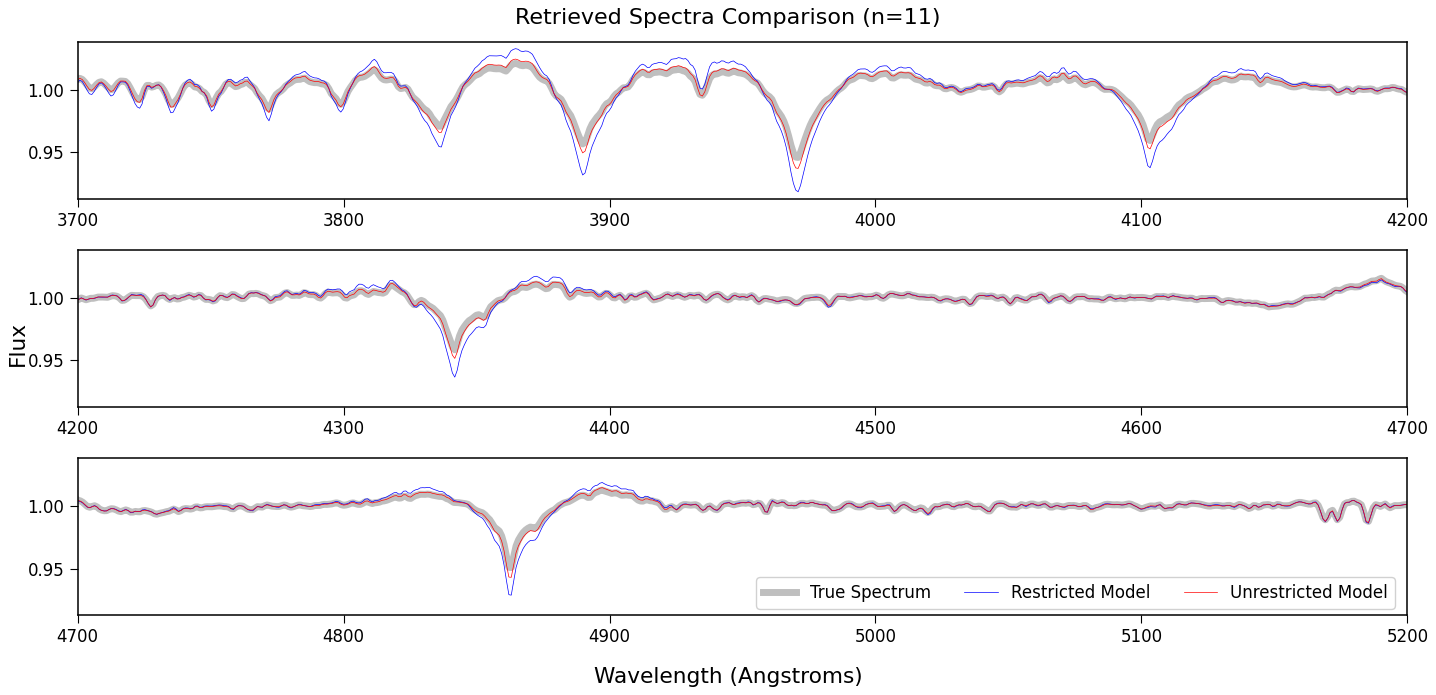

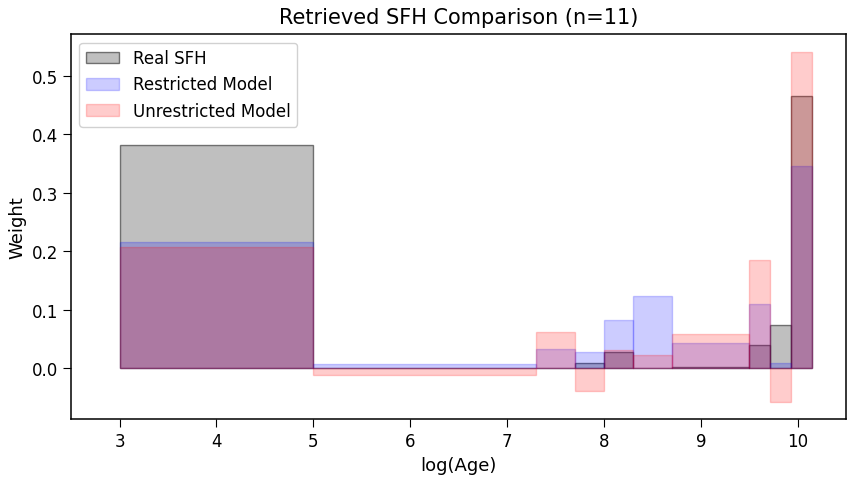

In [2]:
model.compare_spectra(11)
model.compare_sfh(11)

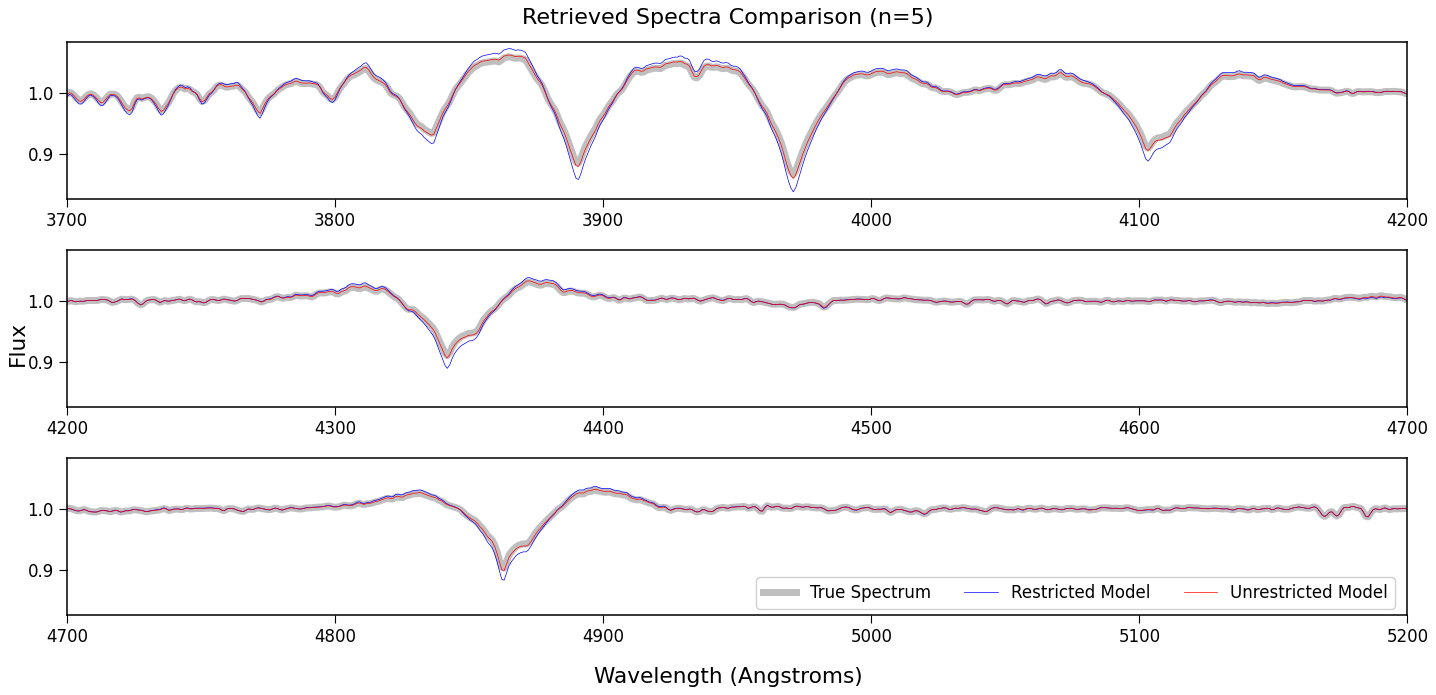

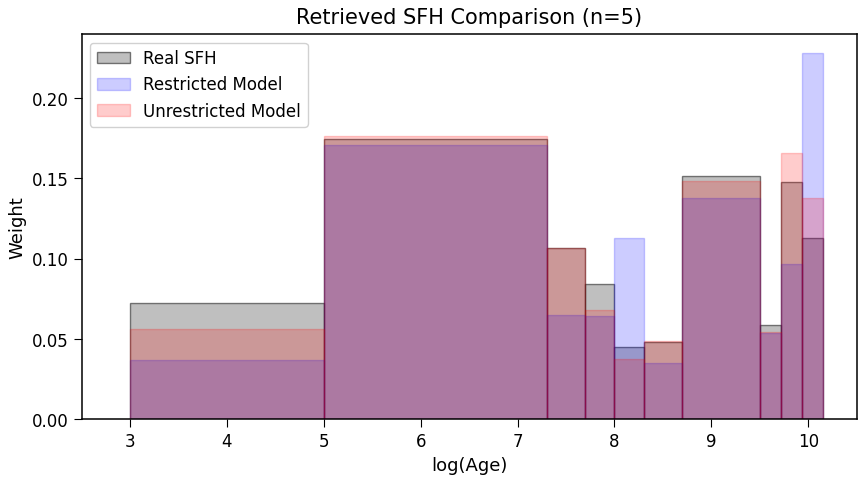

In [3]:
model.compare_spectra(5)
model.compare_sfh(5)

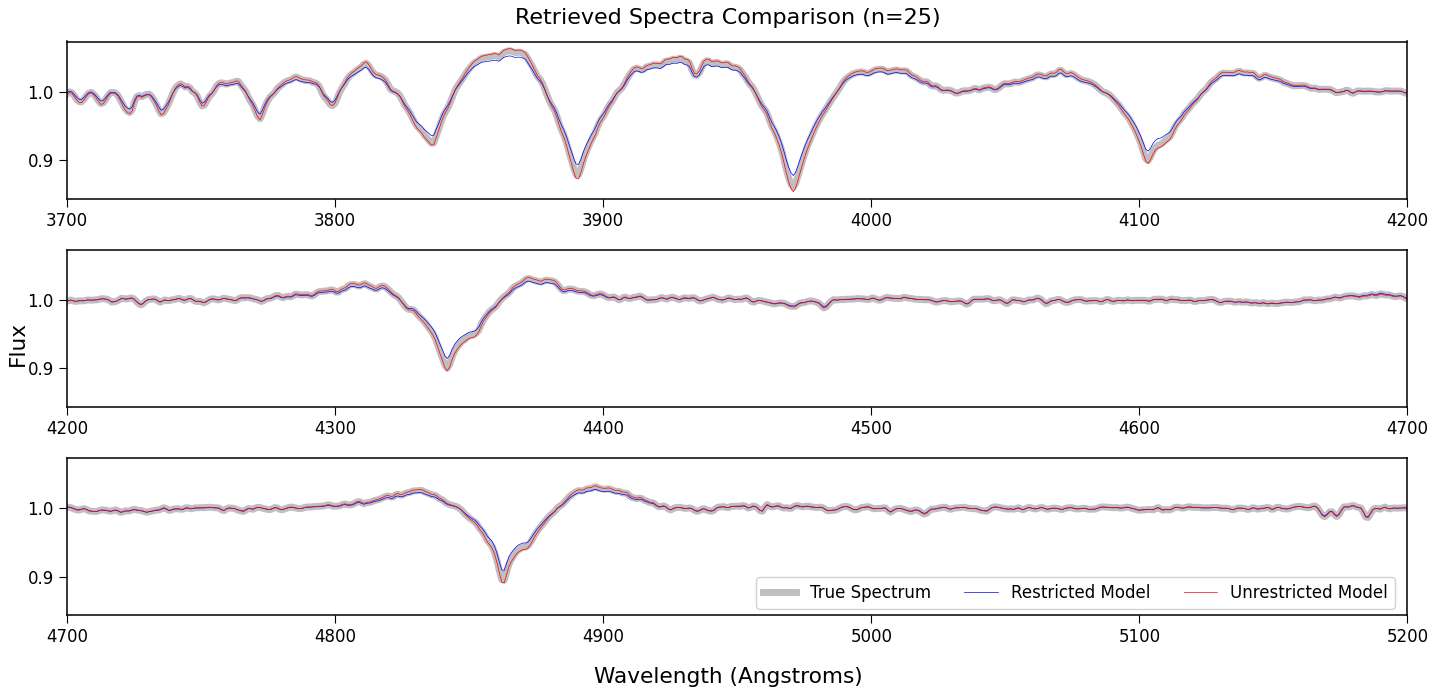

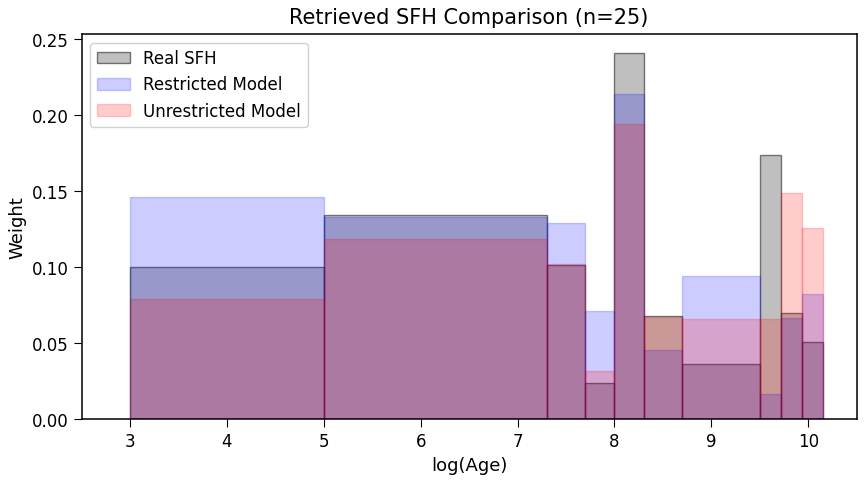

In [4]:
model.compare_spectra(25)
model.compare_sfh(25)

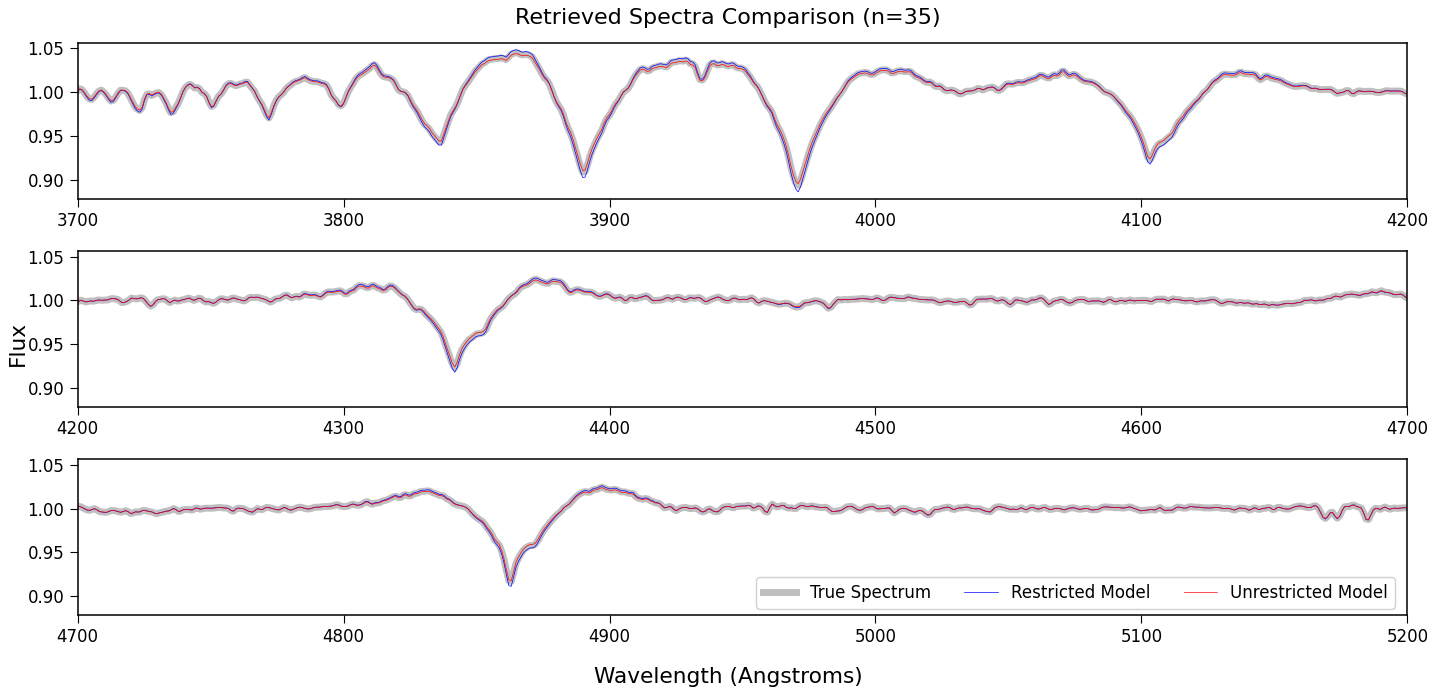

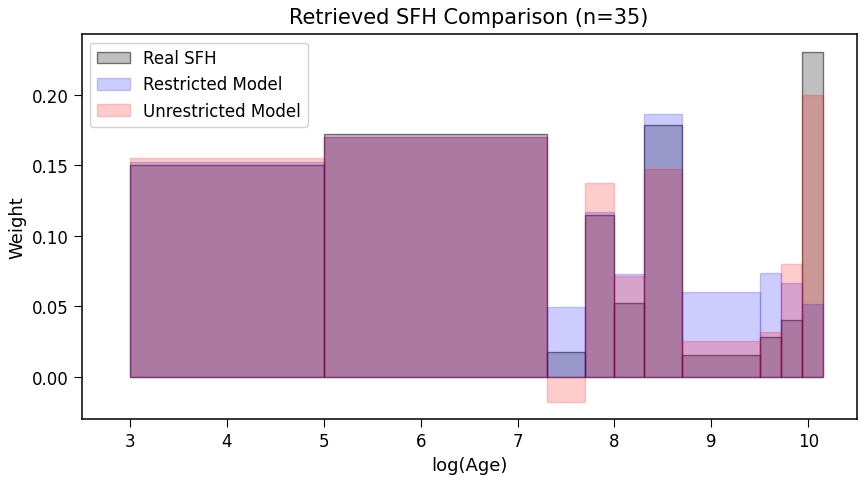

In [5]:
model.compare_spectra(35)
model.compare_sfh(35)

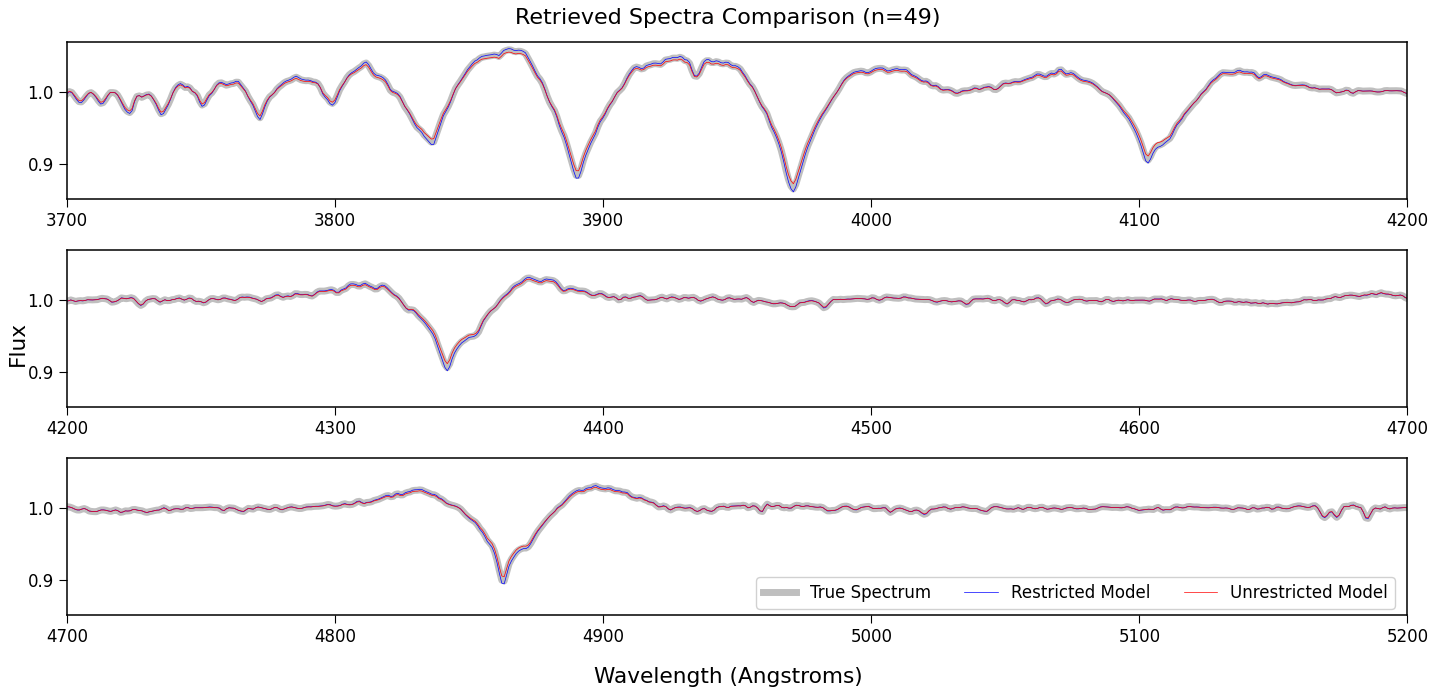

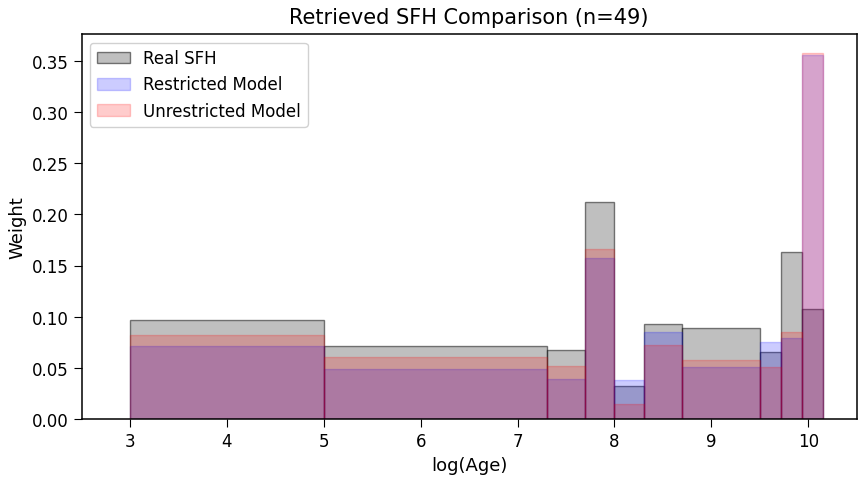

In [6]:
model.compare_spectra(49)
model.compare_sfh(49)

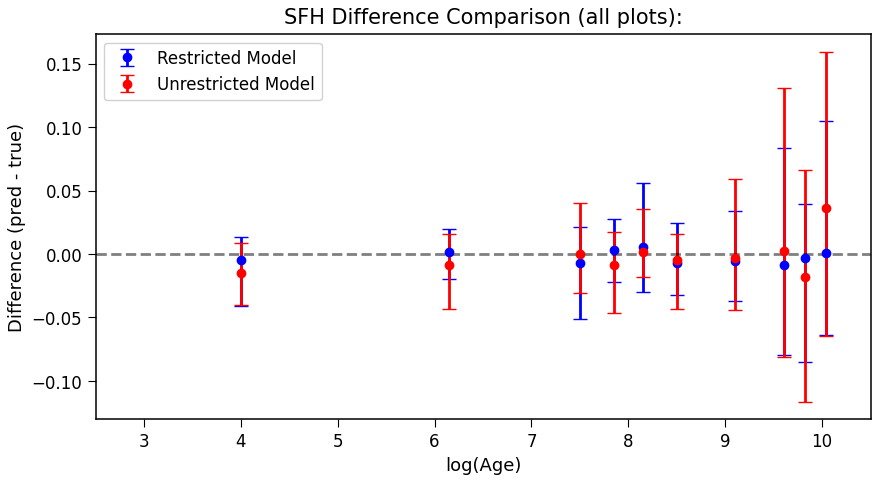

In [7]:
model.compare_difference()

In [8]:
model.compare_rmse()

RMSE Comparison (all plots):
  Label  Restricted  Unrestricted
      1    0.051425      0.061892
      2    0.060918      0.115550
      3    0.035078      0.079909
      4    0.040845      0.064107
      5    0.059389      0.055699
      6    0.044501      0.077185
      7    0.035560      0.084011
      8    0.152030      0.121634
      9    0.089632      0.145583
     10    0.123884      0.197027
Overall    0.079070      0.108906


Text(0.02, 0.5, 'RMSE')

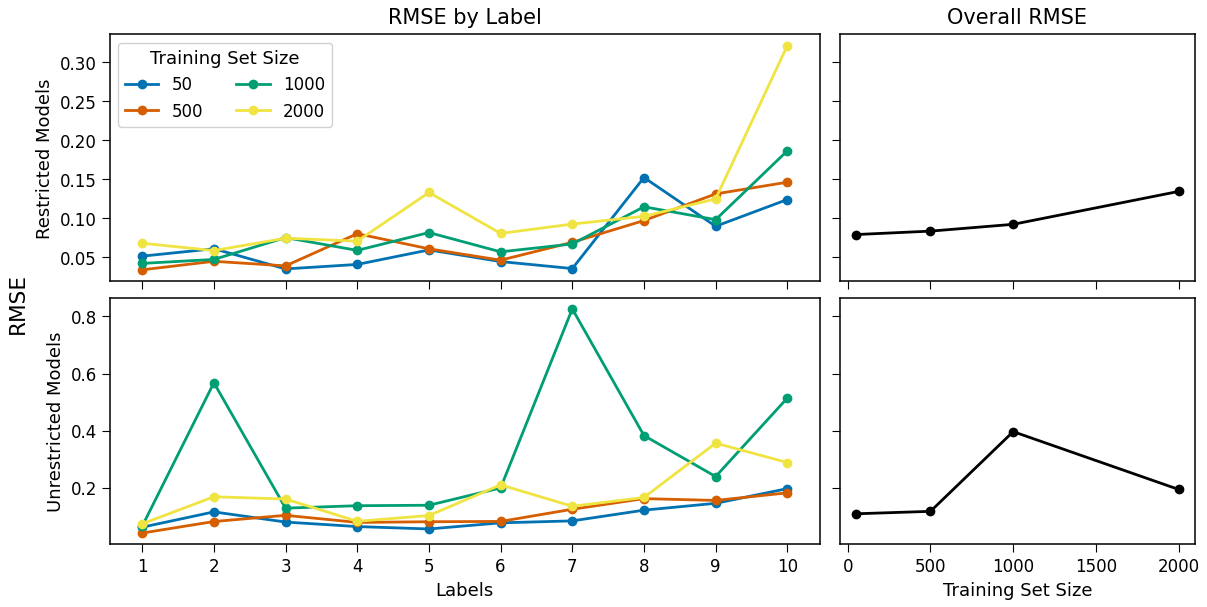

In [2]:
# comparing different size training sets

import matplotlib.pyplot as plt

model_50 = CompareModels("sfh_50_10_20250915_160155")
model_500 = CompareModels("sfh_500_10_20250915_154049")
model_1000 = CompareModels("sfh_1000_10_20250911_104717")
model_2000 = CompareModels("sfh_2000_10_20250915_154703")

models = [model_50, model_500, model_1000, model_2000]

fig, ax = plt.subplots(2, 2, figsize=(12, 6), sharex='col', sharey='row', constrained_layout=True, gridspec_kw={'width_ratios': [2, 1]})

res_overall = []
unres_overall = []
for m in models:
    df = m.compare_rmse()
    res_labels = df['Restricted'][:-1]
    unres_labels = df['Unrestricted'][:-1]
    res_overall.append(df['Restricted'].iloc[-1])
    unres_overall.append(df['Unrestricted'].iloc[-1])
    labels = df['Label'][:-1]

    ax[0,0].plot(labels, res_labels, marker='o')
    ax[1,0].plot(labels, unres_labels, marker='o')

ax[0,1].plot([50,500,1000,2000], res_overall, 'k', marker='o')
ax[1,1].plot([50,500,1000,2000], unres_overall, 'k', marker='o')

ax[0,0].set_ylabel("Restricted Models")
ax[0,0].set_title("RMSE by Label")
ax[0,0].legend(labels=['50', '500', '1000', '2000'], title='Training Set Size', ncols=2)
ax[0,1].set_title("Overall RMSE")
ax[1,0].set_ylabel("Unrestricted Models")
ax[1,0].set_xlabel("Labels")
ax[1,1].set_xlabel("Training Set Size")

fig.supylabel('RMSE')

Text(0.5, 0.98, 'Dependent Sample t-test p-values between real and predicted labels')

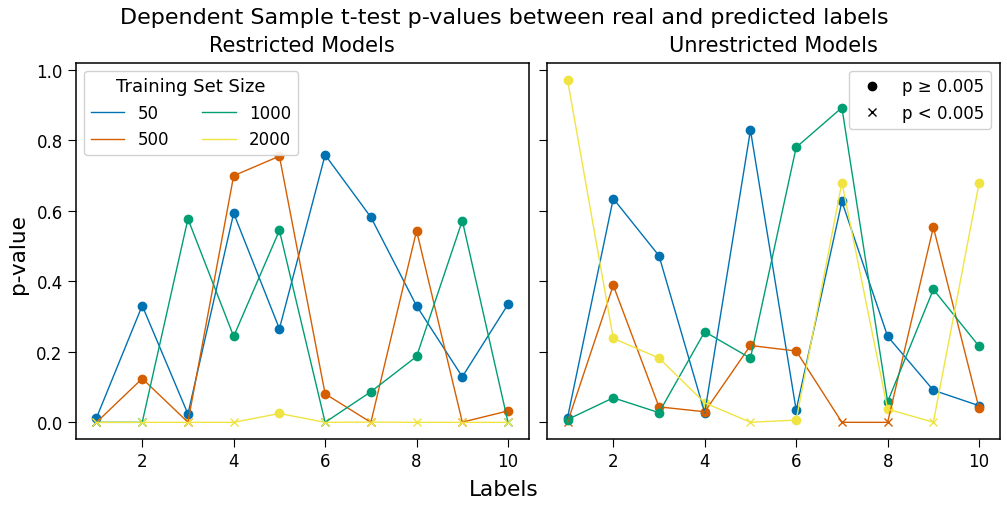

In [5]:
import matplotlib.lines as mlines

fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True, constrained_layout=True)
labels = range(1,11)
model_labels = ['50', '500', '1000', '2000']
line_handles = []

for idx, m in enumerate(models):
    df = m.t_test()
    res = df['Restricted']
    unres = df['Unrestricted']

    color = f'C{idx}'

    # Plot lines for Restricted and Unrestricted, save handles for legend
    line_res, = ax[0].plot(labels, res, color=color, linewidth=1, zorder=2, label=model_labels[idx])
    line_unres, = ax[1].plot(labels, unres, color=color, linewidth=1, zorder=2, label=model_labels[idx])
    line_handles.append(line_res)

    # Overlay points with open/closed circles for Restricted
    for i, y in enumerate(res):
        markerstyle = 'o' if y>=0.005 else 'x'
        ax[0].plot(labels[i], y, marker=markerstyle, linestyle='None', color=color, zorder=1)
    # Overlay points with open/closed circles for Unrestricted
    for i, y in enumerate(unres):
        markerstyle = 'o' if y>=0.005 else 'x'
        ax[1].plot(labels[i], y, marker=markerstyle, linestyle='None', color=color, zorder=1)

# Legend for line colors (training set size)
ax[0].legend(handles=line_handles, labels=model_labels, title='Training Set Size', loc='upper left', ncols=2)

# Custom legend for marker styles (p-value)
marker_o = mlines.Line2D([], [], color='k', marker='o', linestyle='None', label='p ≥ 0.005')
marker_x = mlines.Line2D([], [], color='k', marker='x', linestyle='None', label='p < 0.005')
ax[1].legend(handles=[marker_o, marker_x], loc='upper right')
ax[0].set_title("Restricted Models")
ax[1].set_title("Unrestricted Models")
fig.supylabel("p-value")
fig.supxlabel("Labels")
fig.suptitle("Dependent Sample t-test p-values between real and predicted labels")


Text(0.5, 0.98, 'Bootstrapped p-values between real and predicted labels')

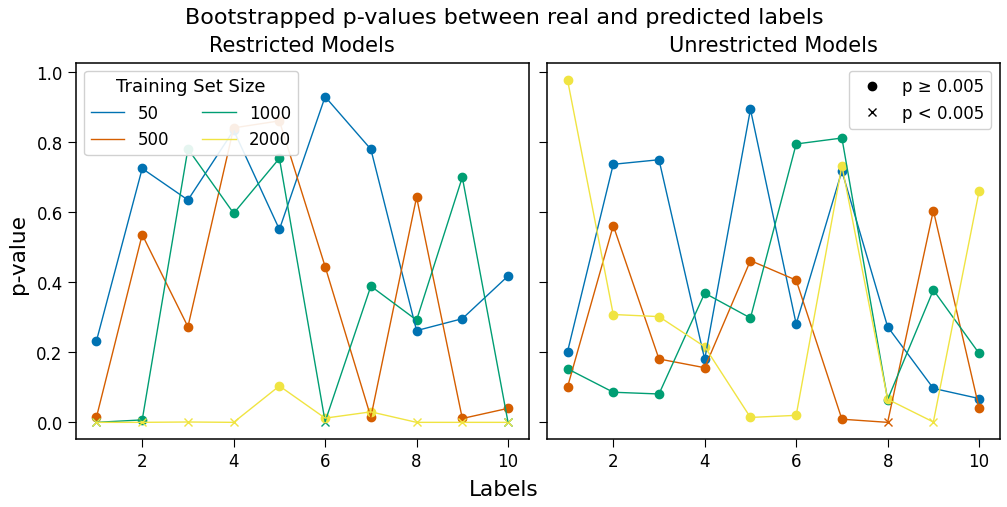

In [6]:
import matplotlib.lines as mlines

fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True, constrained_layout=True)
labels = range(1,11)
model_labels = ['50', '500', '1000', '2000']
line_handles = []

for idx, m in enumerate(models):
    df = m.bootstrap()
    res = df['Restricted']
    unres = df['Unrestricted']

    color = f'C{idx}'

    # Plot lines for Restricted and Unrestricted, save handles for legend
    line_res, = ax[0].plot(labels, res, color=color, linewidth=1, zorder=2, label=model_labels[idx])
    line_unres, = ax[1].plot(labels, unres, color=color, linewidth=1, zorder=2, label=model_labels[idx])
    line_handles.append(line_res)

    # Overlay points with open/closed circles for Restricted
    for i, y in enumerate(res):
        markerstyle = 'o' if y>=0.005 else 'x'
        ax[0].plot(labels[i], y, marker=markerstyle, linestyle='None', color=color, zorder=1)
    # Overlay points with open/closed circles for Unrestricted
    for i, y in enumerate(unres):
        markerstyle = 'o' if y>=0.005 else 'x'
        ax[1].plot(labels[i], y, marker=markerstyle, linestyle='None', color=color, zorder=1)

# Legend for line colors (training set size)
ax[0].legend(handles=line_handles, labels=model_labels, title='Training Set Size', loc='upper left', ncols=2)

# Custom legend for marker styles (p-value)
marker_o = mlines.Line2D([], [], color='k', marker='o', linestyle='None', label='p ≥ 0.005')
marker_x = mlines.Line2D([], [], color='k', marker='x', linestyle='None', label='p < 0.005')
ax[1].legend(handles=[marker_o, marker_x], loc='upper right')
ax[0].set_title("Restricted Models")
ax[1].set_title("Unrestricted Models")
fig.supylabel("p-value")
fig.supxlabel("Labels")
fig.suptitle("Bootstrapped p-values between real and predicted labels")
